## 提升集成算法：重要参数n_estimators

In [1]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [2]:
data = load_boston()
# 波士顿数据集非常简单，但它所涉及到的问题却很多

In [3]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
X = data.data
y = data.target

In [5]:
X.shape

(506, 13)

In [6]:
y.shape

(506,)

In [7]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3, random_state=420)

### 建模，查看其他接口和属性

In [9]:
reg = XGBR(n_estimators=100).fit(Xtrain, Ytrain)  # 训练

In [10]:
reg.predict(Xtest)  # 传统接口predict

array([ 6.6689262, 22.34918  , 31.052807 , 13.911593 ,  9.467967 ,
       22.658588 , 14.514282 , 15.092699 , 15.293644 , 12.680115 ,
       24.140797 , 35.890083 , 21.573483 , 27.07066  , 19.052658 ,
        9.89033  , 23.386076 , 23.588493 , 23.311466 , 22.401644 ,
       18.98444  , 15.766946 , 25.8352   , 20.193802 , 19.982517 ,
       15.611423 , 22.883228 , 29.838228 , 22.815304 , 16.779034 ,
       37.13194  , 20.133307 , 19.67352  , 23.525528 , 22.845137 ,
       23.87397  , 15.17887  , 23.45934  , 16.685331 , 31.761686 ,
       18.525843 , 22.441063 , 38.48728  , 17.93719  , 15.10122  ,
       28.980541 , 46.363487 , 12.842797 ,  9.618281 , 35.40579  ,
       25.657566 , 20.605602 , 20.800055 , 49.228447 , 31.355848 ,
       29.382515 , 18.911947 , 21.049877 , 16.165169 , 18.098577 ,
       14.659002 , 21.720213 , 19.413454 , 28.932102 , 30.573524 ,
       19.228426 , 20.531511 , 15.666288 , 23.52929  , 19.30554  ,
       28.384985 , 42.83562  , 29.429724 , 23.306015 , 19.7412

In [11]:
reg.score(Xtest, Ytest)  # 你能想出这里应该返回什么模型评估指标么？利用shift+Tab可以知道，R^2评估指标

0.9050988954757183

In [12]:
y.mean()

22.532806324110677

In [13]:
MSE(Ytest, reg.predict(Xtest))  # 可以看出均方误差是平均值y.mean()的1/3左右，结果不算好也不算坏

8.830916470718748

In [14]:
# 树模型的优势之一：能够查看模型的重要性分数，可以使用嵌入法(SelectFromModel)进行特征选择
reg.feature_importances_
# xgboost可以使用嵌入法进行特征选择

array([0.01902167, 0.0042109 , 0.01478317, 0.00553536, 0.02222195,
       0.37914094, 0.01679687, 0.04698721, 0.04073574, 0.05491758,
       0.0668422 , 0.00869463, 0.32011184], dtype=float32)

### 交叉验证，与线性回归&随机森林回归进行对比

In [15]:
reg = XGBR(n_estimators=100)  # 交叉验证中导入的没有经过训练的模型

In [16]:
CVS(reg, Xtrain, Ytrain, cv=5).mean()
# 这里应该返回什么模型评估指标，还记得么？ 返回的是与reg.score相同的评估指标R^2（回归），准确率（分类）

0.7995062802699481

In [17]:
# 谨的交叉验证与不严谨的交叉验证之间的讨论：训练集 or 全数据？
CVS(reg, Xtrain, Ytrain, cv=5)

array([0.83123948, 0.77538513, 0.82292471, 0.81418644, 0.75379564])

In [18]:
# 严谨 vs 不严谨

In [19]:
CVS(reg, Xtrain, Ytrain, cv=5, scoring='neg_mean_squared_error').mean()

-16.215644658473447

In [20]:
# 来查看一下sklearn中所有的模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [21]:
# 使用随机森林和线性回归进行一个对比
rfr = RFR(n_estimators=100)
CVS(rfr, Xtrain, Ytrain, cv=5).mean()  # 0.7975497480638329

0.7961457927094642

In [22]:
# -16.998723616338033
CVS(rfr, Xtrain, Ytrain, cv=5, scoring='neg_mean_squared_error').mean()

-16.85795268193159

In [23]:
lr = LinearR()
CVS(lr, Xtrain, Ytrain, cv=5).mean()  # 0.6835070597278085

0.6835070597278082

In [24]:
# -25.34950749364844
CVS(lr, Xtrain, Ytrain, cv=5, scoring='neg_mean_squared_error').mean()

-25.349507493648453

In [25]:
# 如果开启参数slient：在数据巨大，预料到算法运行会非常缓慢的时候可以使用这个参数来监控模型的训练进度
# xgboost库silent=True不会打印训练进程，只返回运行结果，默认是False会打印训练进程
reg = XGBR(n_estimators=10, silent=True)
# sklearn库中的xgbsoost的默认为silent=True不会打印训练进程，想打印需要手动设置为False
# -92.67865836936579
CVS(reg, Xtrain, Ytrain, cv=5, scoring='neg_mean_squared_error').mean()

[16:17:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:17:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:17:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

-18.63373361656663

### 定义绘制以训练样本数为横坐标的学习曲线的函数

In [26]:
def plot_learning_curve(estimator, title, X, y,
                        ax=None,  # 选择子图
                        ylim=None,  # 设置纵坐标的取值范围
                        cv=None,  # 交叉验证
                        n_jobs=None  # 设定索要使用的线程
                        ):

    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, shuffle=True, cv=cv, random_state=420, n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()  # 绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1),
            'o-', color="r", label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1),
            'o-', color="g", label="Test score")
    ax.legend(loc="best")
    return ax

### 使用学习曲线观察XGB在波士顿数据集上的潜力

In [27]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 交叉验证模式

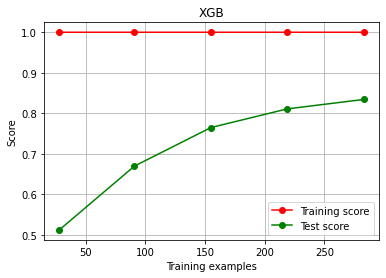

In [28]:
plot_learning_curve(XGBR(n_estimators=100, random_state=420),
                    "XGB", Xtrain, Ytrain, ax=None, cv=cv)
plt.show()

### 使用参数学习曲线观察n_estimators对模型的影响

160 0.8320776685832459


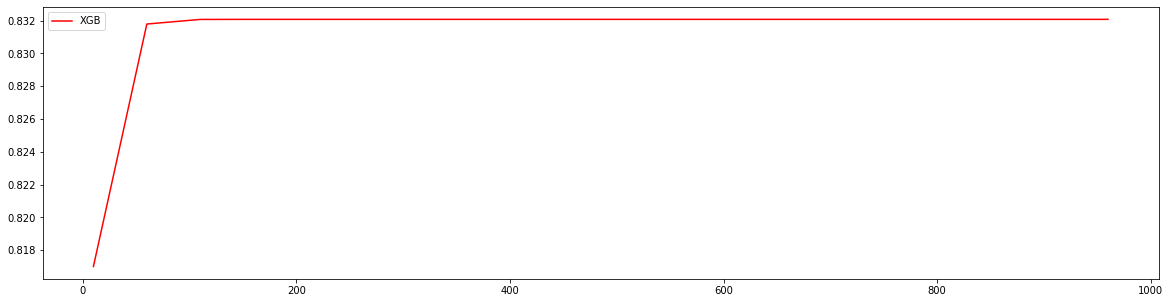

In [29]:
#=====【TIME WARNING：25 seconds】=====#

axisx = range(10, 1010, 50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i, random_state=420)
    rs.append(CVS(reg, Xtrain, Ytrain, cv=cv).mean())
print(axisx[rs.index(max(rs))], max(rs))
plt.figure(figsize=(20, 5))
plt.plot(axisx, rs, c="red", label="XGB")
plt.legend()
plt.show()

### 进化的学习曲线：方差与泛化误差

100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517 0.03353715574288529


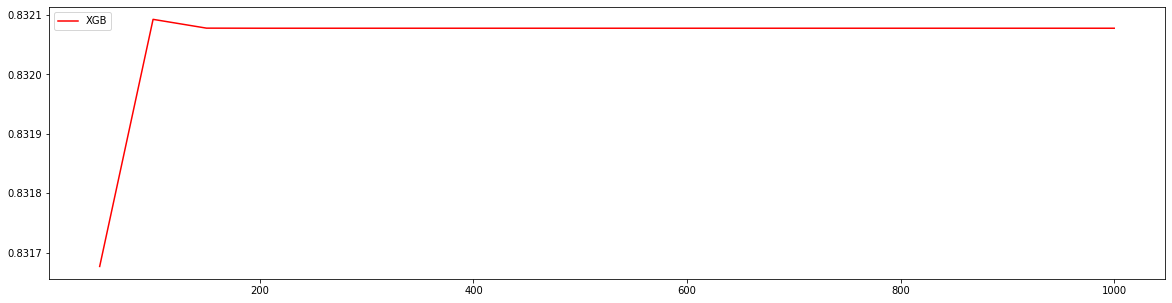

In [32]:
#======【TIME WARNING: 20s】=======#
axisx = range(50, 1050, 50)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i, random_state=420)
    cvresult = CVS(reg, Xtrain, Ytrain, cv=cv)
    # 记录1-偏差
    rs.append(cvresult.mean())
    # 记录方差
    var.append(cvresult.var())
    # 计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2+cvresult.var())
# 打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))], max(rs), var[rs.index(max(rs))])
# 打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))], rs[var.index(min(var))], min(var))
# 打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))], rs[ge.index(min(ge))],
      var[ge.index(min(ge))], min(ge))
plt.figure(figsize=(20, 5))
plt.plot(axisx, rs, c="red", label="XGB")
plt.legend()
plt.show()

100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517 0.03353715574288529


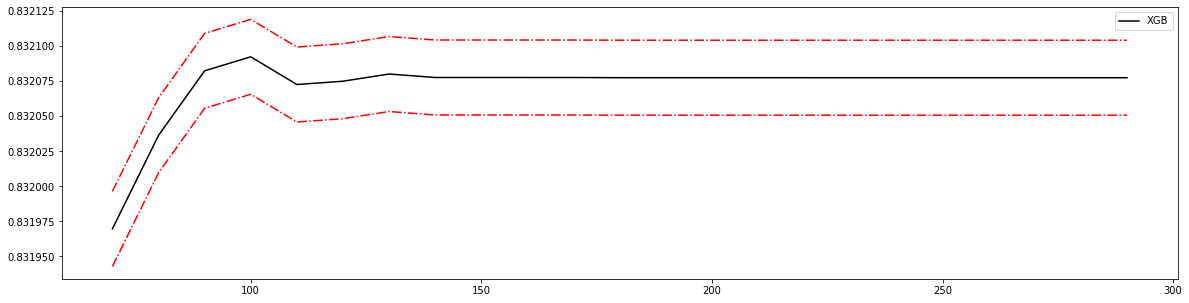

In [38]:
axisx = range(70, 300, 10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i, random_state=420)
    cvresult = CVS(reg, Xtrain, Ytrain, cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))], max(rs), var[rs.index(max(rs))])
print(axisx[var.index(min(var))], rs[var.index(min(var))], min(var))
print(axisx[ge.index(min(ge))], rs[ge.index(min(ge))],
      var[ge.index(min(ge))], min(ge))
rs = np.array(rs)
var = np.array(var)*0.005
plt.figure(figsize=(20, 5))
plt.plot(axisx, rs, c="black", label="XGB")
# 添加方差线
plt.plot(axisx, rs+var, c="red", linestyle='-.')
plt.plot(axisx, rs-var, c="red", linestyle='-.')
plt.legend()
plt.show()

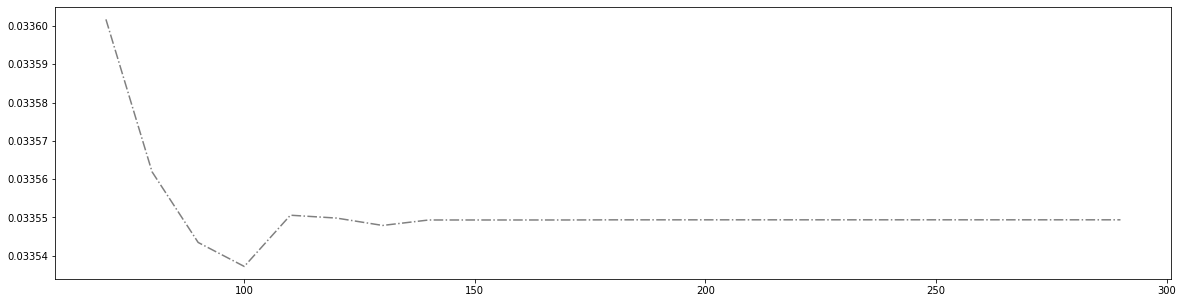

In [39]:
# 看看泛化误差的可控部分如何？
plt.figure(figsize=(20, 5))
plt.plot(axisx, ge, c="gray", linestyle='-.')
plt.show()

In [40]:
# 验证模型效果是否提高了？
time0 = time()
print(XGBR(n_estimators=100, random_state=420).fit(
    Xtrain, Ytrain).score(Xtest, Ytest))
print(time()-time0)

0.9050988954757183
0.1290290355682373


In [41]:
time0 = time()
print(XGBR(n_estimators=660, random_state=420).fit(
    Xtrain, Ytrain).score(Xtest, Ytest))
print(time()-time0)

0.9050526024842831
0.17937421798706055


In [42]:
time0 = time()
print(XGBR(n_estimators=180, random_state=420).fit(
    Xtrain, Ytrain).score(Xtest, Ytest))
print(time()-time0)

0.9050526024842831
0.17410778999328613
